# Sales and Customer Behavior Analysis

### Problem Statement: 
The company wants to analyze its sales data to understand customer purchasing behavior, identify top-selling products, and optimize inventory management.  

##### Objectives:  

Identify top-selling products.  
Analyze customer purchasing patterns.  
Optimize inventory levels to reduce stockouts and overstock.  


In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [40]:
import dataframe_image as dfi

##### Dataset Description
The dataset consists of 10 orders with the following columns:  
  
OrderID: Unique identifier for each order.  
CustomerID: Unique identifier for each customer.  
ProductID: Unique identifier for each product.  
Quantity: Number of units ordered.  
Price: Price per unit of the product.  
OrderDate: Date of the order.  
Category: Product category.  
Region: Region where the order was placed.  
TotalSales: Total sales amount for each order (calculated as Quantity * Price).  

In [2]:
data = {
    'OrderID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'CustomerID': ['C001', 'C002', 'C003', 'C004', 'C001', 'C002', 'C005', 'C006', 'C007', 'C001'],
    'ProductID': ['P001', 'P002', 'P003', 'P001', 'P004', 'P002', 'P005', 'P006', 'P003', 'P001'],
    'Quantity': [2, 1, 3, 1, 4, 2, 1, 1, 2, 1],
    'Price': [50.00, 150.00, 20.00, 50.00, 15.00, 150.00, 100.00, 200.00, 20.00, 50.00],
    'OrderDate': ['2024-07-01', '2024-07-02', '2024-07-02', '2024-07-03', '2024-07-03',
                                 '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09'],
    'Category': ['Electronics', 'Apparel', 'Groceries', 'Electronics', 'Groceries', 'Apparel', 'Home', 'Electronics', 'Groceries', 'Electronics'],
    'Region': ['North', 'East', 'West', 'South', 'North', 'East', 'West', 'North', 'East', 'North']
}

converted OrderDate date to Datetime using pandas method

In [3]:
df = pd.DataFrame(data)

In [4]:
df   # there are 10 rows and 8 columns in this dataset

,OrderID,CustomerID,ProductID,Quantity,Price,OrderDate,Category,Region
0,1001,C001,P001,2,50.0,2024-07-01,Electronics,North
1,1002,C002,P002,1,150.0,2024-07-02,Apparel,East
2,1003,C003,P003,3,20.0,2024-07-02,Groceries,West
3,1004,C004,P001,1,50.0,2024-07-03,Electronics,South
4,1005,C001,P004,4,15.0,2024-07-03,Groceries,North
5,1006,C002,P002,2,150.0,2024-07-05,Apparel,East
6,1007,C005,P005,1,100.0,2024-07-06,Home,West
7,1008,C006,P006,1,200.0,2024-07-07,Electronics,North
8,1009,C007,P003,2,20.0,2024-07-08,Groceries,East
9,1010,C001,P001,1,50.0,2024-07-09,Electronics,North


In [5]:
df.count()

OrderID       10
CustomerID    10
ProductID     10
Quantity      10
Price         10
OrderDate     10
Category      10
Region        10
dtype: int64

### Data Cleaning

In [6]:
# check for null values
df.isnull()

,OrderID,CustomerID,ProductID,Quantity,Price,OrderDate,Category,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


### Objective 1:
#### Identify top-selling products.


In [7]:
df["TotalSales"]= df["Quantity"] * df["Price"]

In [8]:
df["TotalSales"]

0    100.0
1    150.0
2     60.0
3     50.0
4     60.0
5    300.0
6    100.0
7    200.0
8     40.0
9     50.0
Name: TotalSales, dtype: float64

### Highest Sales details

In [9]:
# find max index from totalsales
max_sales = df["TotalSales"].idxmax()

In [10]:
height_sales = df.loc[max_sales]
height_sales

OrderID             1006
CustomerID          C002
ProductID           P002
Quantity               2
Price              150.0
OrderDate     2024-07-05
Category         Apparel
Region              East
TotalSales         300.0
Name: 5, dtype: object

So, productId ---> P002 whcih 2nd product has highest sales 

In [11]:
# Group by ProductID to find top-selling products
top_products = df.groupby('ProductID')['TotalSales'].sum().sort_values(ascending=False).head()

In [12]:
top_products

ProductID
P002    450.0
P001    200.0
P006    200.0
P003    100.0
P005    100.0
Name: TotalSales, dtype: float64

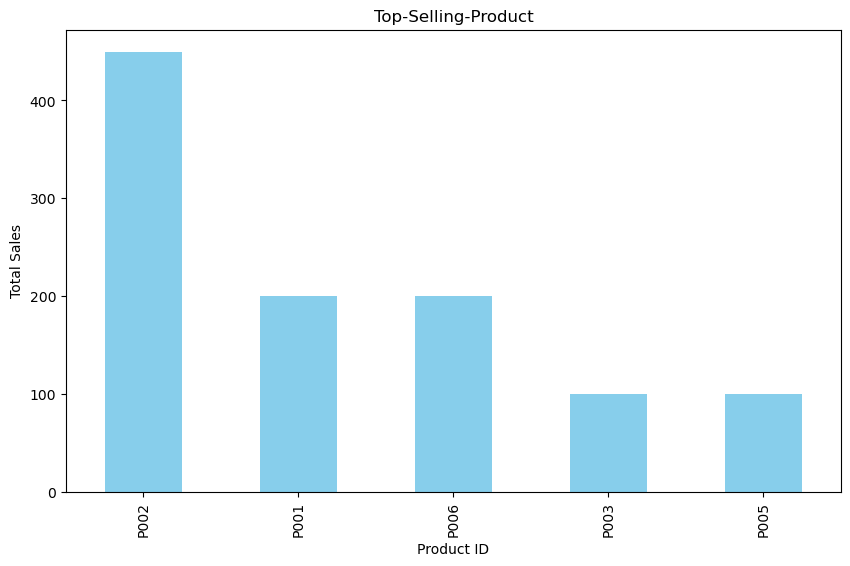

In [13]:
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color="Skyblue")
plt.title("Top-Selling-Product")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.savefig('Top_selling_product.png')
plt.show()

In [14]:
# Top Selling Product by Region
regional_sales= df.groupby('Region')['TotalSales'].sum().sort_index()
regional_sales

Region
East     490.0
North    410.0
South     50.0
West     160.0
Name: TotalSales, dtype: float64

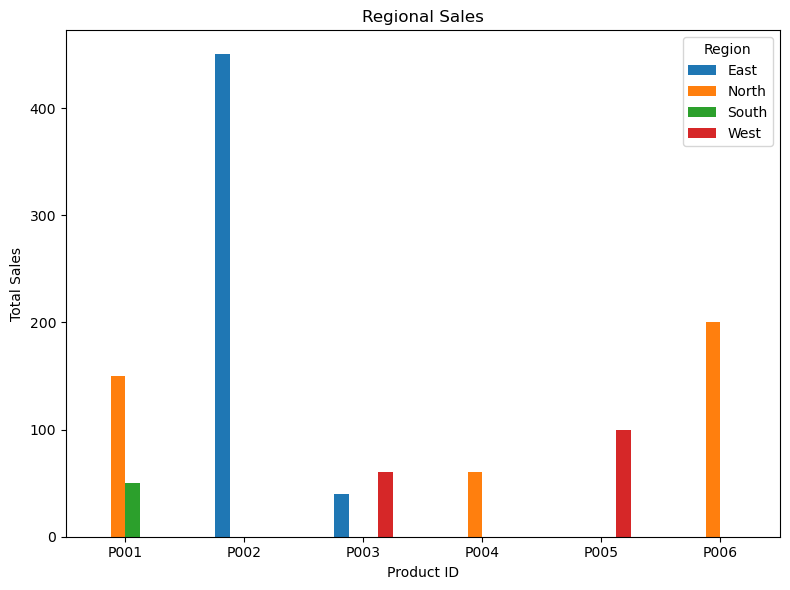

In [15]:
# Pivot the DataFrame for easier plotting
pivot_df = df.pivot_table(index='ProductID', columns='Region', values='TotalSales', aggfunc='sum', fill_value=0)

# Plot
pivot_df.plot(kind='bar', figsize=(8, 6))
plt.title('Regional Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Regional_sales.png')
plt.show()

### Objective 2
#### Analyze customer purchasing patterns.

In [47]:
# Here i'm using statistical methods to analyze the customer behaviors

### Descriptive Statistics

In [48]:
# mean()
# median()
# standard Deviation std()

In [49]:
mean_value = df['TotalSales'].mean()
mean_value

111.0

In [50]:
median_value = df['TotalSales'].median()
median_value

80.0

In [51]:
std_value = df["TotalSales"].std()
std_value

83.72574275573791

In [52]:
df.describe()   # this is in-built pandas method to find its discriptive statistics

,OrderID,Quantity,Price,TotalSales
count,10.00000,10.000000,10.000000,10.000000
mean,1005.50000,1.800000,80.500000,111.000000
std,3.02765,1.032796,65.593445,83.725743
min,1001.00000,1.000000,15.000000,40.000000
25%,1003.25000,1.000000,27.500000,52.500000
50%,1005.50000,1.500000,50.000000,80.000000
75%,1007.75000,2.000000,137.500000,137.500000
max,1010.00000,4.000000,200.000000,300.000000


In [53]:
purchase_frequency = df.groupby('CustomerID')['OrderID'].count().reset_index()
purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']
purchase_frequency

,CustomerID,PurchaseFrequency
0,C001,3
1,C002,2
2,C003,1
3,C004,1
4,C005,1
5,C006,1
6,C007,1


In [54]:
dfi.export(purchase_frequency, "Purchase_fq.png")

In [61]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
last_purchase = df.groupby('CustomerID')['OrderDate'].max().reset_index()
last_purchase['Recency (days ago)'] = (df['OrderDate'].max() - last_purchase['OrderDate']).dt.days
dfi.export(last_purchase, "Recency.png")
last_purchase

,CustomerID,OrderDate,Recency (days ago)
0,C001,2024-07-09,0
1,C002,2024-07-05,4
2,C003,2024-07-02,7
3,C004,2024-07-03,6
4,C005,2024-07-06,3
5,C006,2024-07-07,2
6,C007,2024-07-08,1


In [62]:
monetary_value = df.groupby('CustomerID')['TotalSales'].sum().reset_index()
monetary_value.columns = ['CustomerID', 'MonetaryValue']

dfi.export(monetary_value, "Monetory.png")
monetary_value

,CustomerID,MonetaryValue
0,C001,210.0
1,C002,450.0
2,C003,60.0
3,C004,50.0
4,C005,100.0
5,C006,200.0
6,C007,40.0


### Customer Segmentations
Customers are segmented based on their total sales contributions using K-Means clustering.

In [57]:
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().reset_index()
customer_sales

,CustomerID,TotalSales
0,C001,210.0
1,C002,450.0
2,C003,60.0
3,C004,50.0
4,C005,100.0
5,C006,200.0
6,C007,40.0


In [58]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(customer_sales[['TotalSales']])
kmeans

C:\Users\DHANYATHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DHANYATHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [59]:
customer_sales['Segment'] = kmeans.labels_
customer_sales
dfi.export(customer_sales, "Customer_segment.png")

Segment 0: Customers with lower total sales.  
Segment 1: Customers with the highest total sales.  
Segment 2: Customers with moderate total sales.

### Product Analysis and Sales Trends

In [25]:
product_sales = df.groupby('ProductID')['TotalSales'].sum().reset_index()
product_sales['Contribution %'] = product_sales['TotalSales'] / product_sales['TotalSales'].sum() * 100 # claculating percentages of contributions
product_sales

,ProductID,TotalSales,Contribution %
0,P001,200.0,18.018018
1,P002,450.0,40.540541
2,P003,100.0,9.009009
3,P004,60.0,5.405405
4,P005,100.0,9.009009
5,P006,200.0,18.018018


In [26]:
sales_trends = df.groupby('OrderDate')['TotalSales'].sum().reset_index()
sales_trends

,OrderDate,TotalSales
0,2024-07-01,100.0
1,2024-07-02,210.0
2,2024-07-03,110.0
3,2024-07-05,300.0
4,2024-07-06,100.0
5,2024-07-07,200.0
6,2024-07-08,40.0
7,2024-07-09,50.0


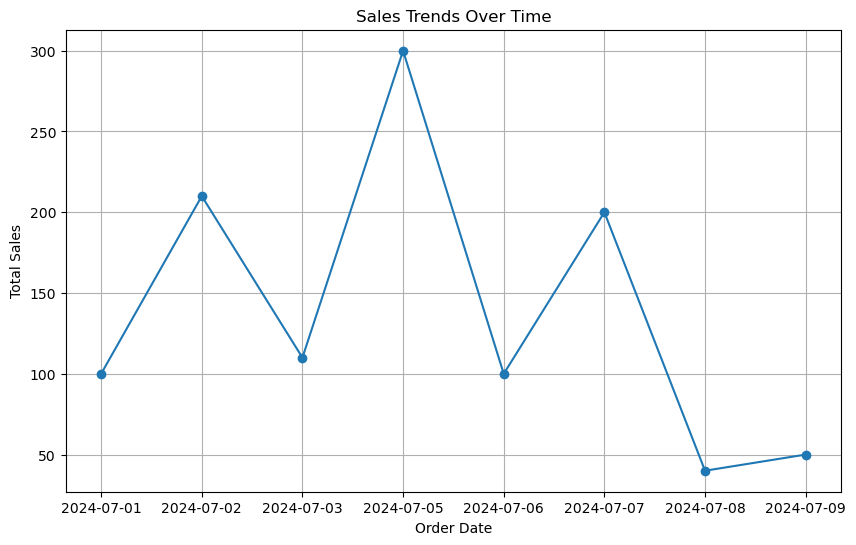

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(sales_trends['OrderDate'], sales_trends['TotalSales'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('Sales_Trend.png')
plt.show()

In [38]:
#Sales Growth Over the Days in a Month
df['Growth_Rate'] = df['TotalSales'].pct_change(periods=1) * 100
Sales_growth = df.groupby('OrderDate')['Growth_Rate'].sum().reset_index()
Sales_growth

,OrderDate,Growth_Rate
0,2024-07-01,0.000000
1,2024-07-02,-10.000000
2,2024-07-03,3.333333
3,2024-07-05,400.000000
4,2024-07-06,-66.666667
5,2024-07-07,100.000000
6,2024-07-08,-80.000000
7,2024-07-09,25.000000


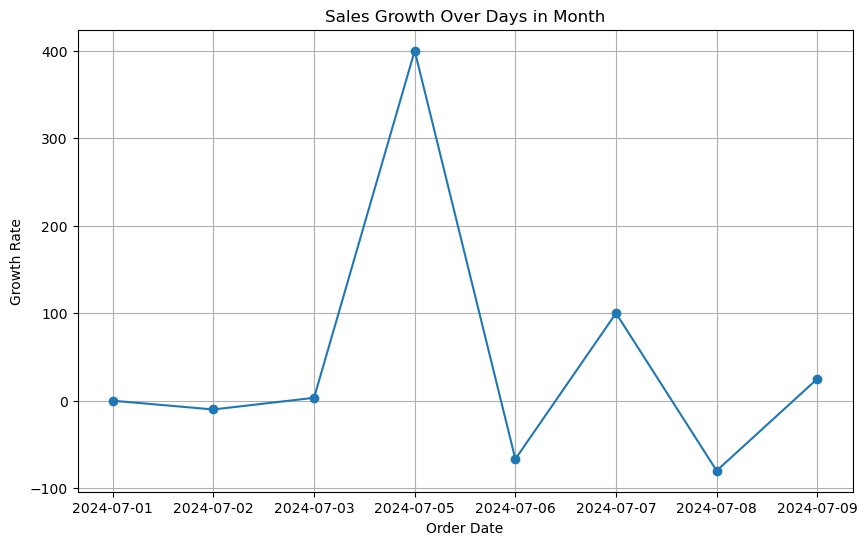

In [47]:
#line Graph
plt.figure(figsize=(10, 6))
plt.plot(Sales_growth['OrderDate'], Sales_growth['Growth_Rate'], marker='o')
plt.title('Sales Growth Over Days in Month')
plt.xlabel('Order Date')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.savefig('Sales_growth.png')
plt.show()

### Revenue by Category

In [28]:
revenue_optimization = df.groupby('Category')['TotalSales'].sum().reset_index()
revenue_optimization['RevenueContribution (%)'] = (revenue_optimization['TotalSales'] / df['TotalSales']) * 100-1
revenue_optimization

,Category,TotalSales,RevenueContribution (%)
0,Apparel,450.0,449.000000
1,Electronics,400.0,265.666667
2,Groceries,160.0,265.666667
3,Home,100.0,199.000000


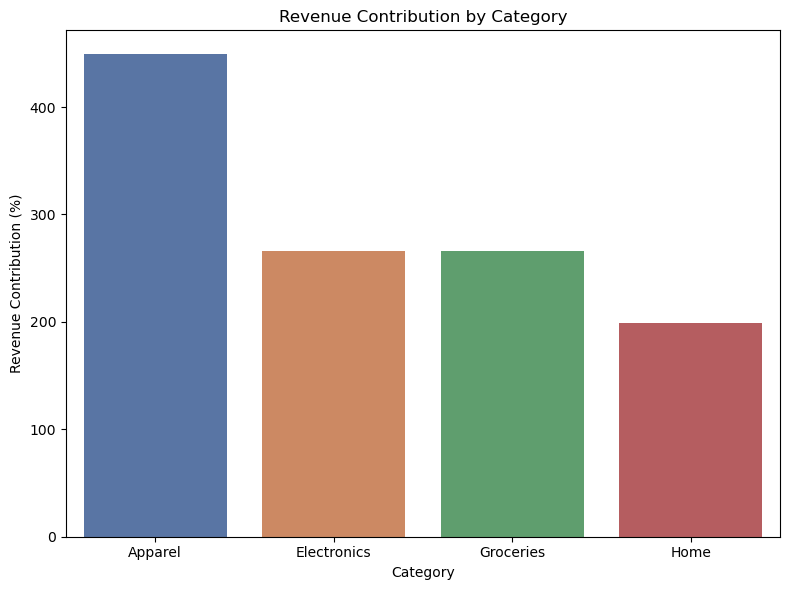

In [51]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='RevenueContribution (%)', data=revenue_optimization, palette='deep')
plt.title('Revenue Contribution by Category')
plt.xlabel('Category')
plt.ylabel('Revenue Contribution (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Revenue.png')
plt.show()

### Objective 3:
Optimize inventory levels to reduce stockouts and overstock.

In [63]:
#  sales performance of each product and identify which products require restocking. 
inventory_management = df.groupby('ProductID')["Quantity"].sum().reset_index()
inventory_management = inventory_management.rename(columns={'Quantity': 'TotalQuantitySold'})
inventory_management 

,ProductID,TotalQuantitySold
0,P001,4
1,P002,3
2,P003,5
3,P004,4
4,P005,1
5,P006,1


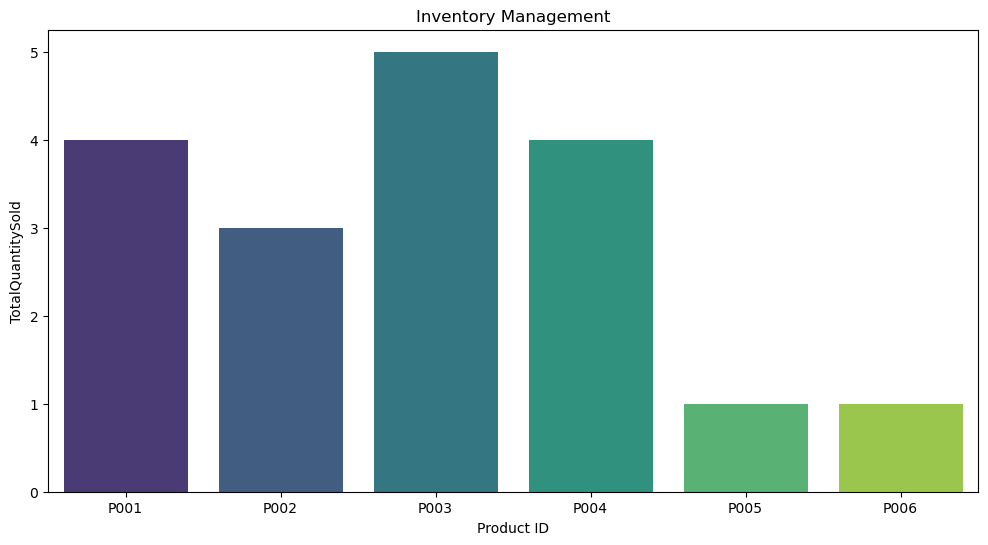

In [52]:
#plot bar graph for Inventory Management
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x='ProductID', y="TotalQuantitySold", data =inventory_management, palette='viridis' )
plt.title("Inventory Management")
plt.xlabel('Product ID')
plt.ylabel('TotalQuantitySold')
plt.savefig('Inventory.png')
plt.show()

## Insights

### Customer Segmentation:   
Most customers fall into Segment 0, indicating a lower purchase volume, while only a few customers (C002) make up the highest sales segment (Segment 1).  
### Product Performance:  
Product P002 is the top-selling product, contributing over 40% of the total sales. Focusing marketing efforts on such high-performing products could boost sales.   
Most of the products from P002 are sold in East Region which shows lead in Sales.  
### Sales Trends:  
There is a noticeable peak in sales on specific dates (e.g., 2024-07-05), which could be due to promotions or other events. Identifying these trends helps in planning future sales strategies.
### Revenue  
Among the categories 'Apperal's are the most Procduct Sold and Generated more Revenue its Evident that Product ID P002 is Top Selling product, more sales in East Region and highest revenue generating Product.
### Inventory management
Product P003 has to restock or reload the product as its the one whcih is sold more in Quantity (TotalQuantitySold = 5).

## Recommendations
-- Need a attentions to the marketing strategies for least sold produdt P003(Under Performing in East and west) regions.  
-- Focus on expanding the Electronics product 